In [1]:
# imports and function definitions
import numpy as np
import sympy as sym
from scipy.integrate import solve_bvp # solve boundary value problem
from scipy.integrate import solve_ivp # solve initial value problem
from scipy.optimize import minimize
import math
pi = math.pi
%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
nt = 101
T = 1
dt = T/(nt-1)
time = np.linspace(0,T,nt)

In [3]:
def dynamics(t, q, u):
    q11, q12, q13, q14, q21, q22, q23, q24, q31, q32, q33, q34, q41, q42, q43, q44 = q 
    u1, u2, u3 = u

    dq11dt = u3*q12 - u2*q13
    dq12dt  = -u3*q11 + u1*q13
    dq13dt = u2*q11 - u1*q12
    dq14dt = q11
    dq21dt = u3*q22 - u2*q23
    dq22dt = -u3*q21 + u1*q23
    dq23dt = u2*q21 - u1*q22
    dq24dt = q21
    dq31dt = u3*q32 - u2*q33
    dq32dt = -u3*q31 + u1*q33
    dq33dt = u2*q31 - u1*q32
    dq34dt = q31
    dq41dt = u3*q42 - u2*q43
    dq42dt = -u3*q41 + u1*q43
    dq43dt = u2*q41 - u1*q42
    dq44dt = q41

    dqdt = [dq11dt, dq12dt, dq13dt, dq14dt, dq21dt, dq22dt, dq23dt, dq24dt, dq31dt, dq32dt, dq33dt, dq34dt, dq41dt, dq42dt, dq43dt, dq44dt]
    return dqdt

In [4]:
## initial conditions

q0 = np.array([[1, 0, 0,0], 
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]])
u0 = np.array([[1.0], [0.5], [0.5]])
display(u0)
u_initials = u0*np.ones((3,101))
display(u_initials.shape)

## our initial conditions through the time line are the same. 
q0_flatten1d = q0.flatten()
q0_flatten = np.reshape(q0_flatten1d, (16, 1))

q_initials = q0_flatten*np.ones((1, 101))
display(q_initials.shape)

array([[1. ],
       [0.5],
       [0.5]])

(3, 101)

(16, 101)

In [5]:
## stack q and u initials for 101 time step into one matrix
state_initials = np.vstack((q_initials, u_initials))
display(state_initials.shape)

(19, 101)

In [6]:
sim = solve_ivp(lambda t, y: dynamics(t,y,u0), [time[0], time[-1]], q0_flatten1d, t_eval=time)

In [7]:
display(sim.y.shape)

(16, 101)

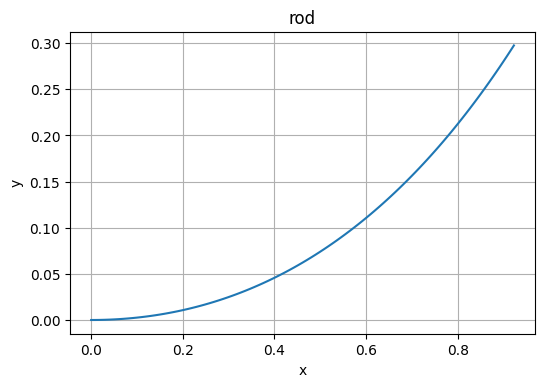

In [8]:
plt.figure(dpi=100,facecolor='w')
plt.plot(sim.y[3],sim.y[7])
axes = plt.gca()
plt.title('rod')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [9]:
display(sim.y)

array([[ 1.        ,  0.999975  ,  0.99990001, ...,  0.7873694 ,
         0.7835549 ,  0.77972297],
       [ 0.        , -0.00497488, -0.00989901, ..., -0.16790804,
        -0.16587537, -0.163768  ],
       [ 0.        ,  0.00502487,  0.010099  , ...,  0.59316924,
         0.59876556,  0.60432206],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

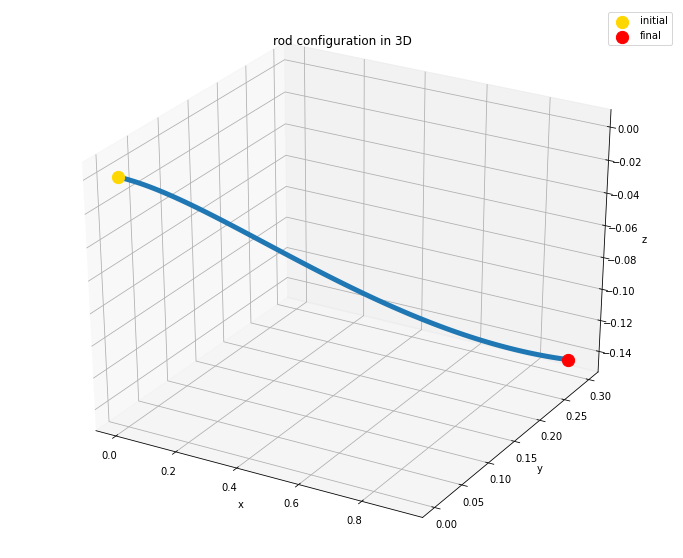

In [10]:
## plot the initial trajectory in 3D
from mpl_toolkits import mplot3d
q14, q24, q34 = sim.y[3], sim.y[7], sim.y[11]
### Interpret initial q's
x = [q14[i] for i in range(nt)]
y = [q24[i] for i in range(nt)]
z = [q34[i] for i in range(nt)]

# 3D plot
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection ='3d')
ax.scatter(x[0], y[0], z[0], marker='o', s=150, color='gold', label='initial')
ax.scatter(x[-1], y[-1], z[-1], marker='o', s=150, color='red', label='final')
ax.set_title('rod configuration in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
ax.plot3D(x, y, z, linewidth=5)

In [11]:
# use arc trajectory as initial guess
# u0 = np.concatenate((np.ones((1,nt)),-0.5 * np.ones((1,N))),axis=0)
# xu0 = np.concatenate((sim.y,u0),axis=0) # columns are time, rows are x, y, theta, u1, u2
# xd = np.zeros((3,N))
# dt = T/(N-1)


# def cost_fun(xu,Q,R,P,N,dt,xd):
#   xu = xu.reshape((5,N))
#   x = xu[0:3,:]
#   u = xu[3:5,:]
#   x_diff = x - xd
#   running_cost = np.zeros((1,N))
#   for i in range(N):
#     running_cost[0,i] = dt * 0.5 * (np.linalg.multi_dot([x_diff[:,i].T, Q, x_diff[:,i]]) \
#                             + np.linalg.multi_dot([u[:,i].T, R, u[:,i]]))
#   cost = np.sum(running_cost) + 0.5 * (np.linalg.multi_dot([x_diff[:,N-1].T, P, x_diff[:,N-1]]))
#   return cost


# def dynamics(xu):
#   xu = xu.reshape((5,N))
#   x = xu[0:3,:]
#   u = xu[3:5,:]
#   error = np.zeros((1,3*(N)))
#   j = 0
#   for i in range(N-1):
#     error[:,j] = x[0,i+1] - (x[0,i] + dt * np.cos(x[2,i]) * u[0,i])
#     error[:,j+1] = x[1,i+1] - (x[1,i] + dt * np.sin(x[2,i]) * u[0,i])
#     error[:,j+2] = x[2,i+1] - (x[2,i] + dt * u[1,i])
#     j = j + 3
#   # enforce initial condition 
#   error[:,j] = x[0,0] - 0
#   error[:,j+1] = x[1,0] - 0
#   error[:,j+2] = x[2,0] - (pi/2)
#   return error.flatten()

In [28]:
## use arc trajectory as initial guess and stack initial u with it to form our state_initials
state_initials = np.vstack((sim.y, u_initials))
state_initials.shape

(19, 101)

In [13]:
## construct costfunction
c1, c2, c3 = 0.5, 0.5, 0.5


def cost_function(state_initials, nt, dt,c1,c2,c3):
    running_cost = np.zeros((nt,1))
    for i in range(nt):
        running_cost[i,1] = dt*0.5*(c1*(state_initials(17,i))**2 + c2*(state_initials(18, i))**2 + c3*(state_initials(19,i)))
    cost = np.sum(running_cost)
    return cost



In [24]:
def system_dynamics(state_initials):
    nt = 101
    dt = 1/(nt - 1)
    q = state_initials[0:16,:]
    u = state_initials[17:19,:]
    error = np.zeros((1, 16*nt))
    for i in range(nt-1):
        
        error[:,j] = q[0,i+1] - (q[0,i] + dt * (u[2,i]*q[1,i] - u[1,i]*q[2,i]))
        error[:,j+1] = q[1,i+1] - (q[1,i] + dt * (-u[2,i]*q[0,i] + u[0,i]*q[2,i]))
        error[:,j+2] = q[2,i+1] - (q[2,i] + dt * (u[1,i]*q[0,i] - u[0,i]*q[1,i]))
        error[:,j+3] = q[3,i+1] - (q[3,i] + dt*q[0,i])
                                       
        error[:,j+4] = q[4,i+1] - (q[4,i] + dt * (u[2,i]*q[5,i] - u[1,i]*q[6,i]))
        error[:,j+5] = q[5,i+1] - (q[5,i] + dt * (-u[2,i]*q[4,i] + u[0,i]*q[6,i]))
        error[:,j+6] = q[6,i+1] - (q[6,i] + dt * (u[1,i]*q[4,i] - u[0,i]*q[5,i]))
        error[:,j+7] = q[7,i+1] - (q[7,i] + dt*q[4,i])
                                       
        error[:,j+8] = q[8,i+1] - (q[8,i] + dt * (u[2,i]*q[9,i] - u[1,i]*q[10,i]))
        error[:,j+9] = q[9,i+1] - (q[9,i] + dt * (-u[2,i]*q[8,i] + u[0,i]*q[10,i]))
        error[:,j+10] = q[10,i+1] - (q[10,i] + dt * (u[1,i]*q[8,i] - u[0,i]*q[9,i])) ## need to double check
        error[:,j+11] = q[11,i+1] - (q[11,i] + dt*q[8,i])
                                         
        error[:,j+12] = q[12,i+1] - (q[12,i] + dt * (u[2,i]*q[13,i] - u[1,i]*q[14,i]))
        error[:,j+13] = q[13,i+1] - (q[13,i] + dt * (-u[2,i]*q[12,i] + u[0,i]*q[14,i]))
        error[:,j+14] = q[14,i+1] - (q[14,i] + dt * (u[1,i]*q[12,i] - u[0,i]*q[13,i]))
        error[:,j+15] = q[15,i+1] - (q[15,i] + dt*q[12,i])
                                         
        j = j+ 16
            
    # enforce final condition 
    error[:,j] = q[0,101] - 1
    error[:,j+1] = q[1,101] - 0
    error[:,j+2] = q[2,101] - 0
    error[:,j+3] = q[3,101] - 0
                                       
    error[:,j+4] = q[4,101] - 0
    error[:,j+5] = q[5,101] - 1
    error[:,j+6] = q[6,101] - 0
    error[:,j+7] = q[7,101] - 0.5
                                       
    error[:,j+8] = q[8,101] - 0
    error[:,j+9] = q[9,101] - 0
    error[:,j+10] = q[10,101] - 1
    error[:,j+11] = q[11,101] - 0
                                         
    error[:,j+12] = q[12,101] - 0
    error[:,j+13] = q[13,101] - 0
    error[:,j+14] = q[14,101] - 0
    error[:,j+15] = q[15,101] - 1
    error[:,j+11] = q[11,101] - 0
                                         
    
    # enforce initial condition 
    error[:,j] = q[0,0] - 1
    error[:,j+1] = q[1,0] - 0
    error[:,j+2] = q[2,0] - 0
    error[:,j+3] = q[3,0] - 0
                                       
    error[:,j+4] = q[4,0] - 0
    error[:,j+5] = q[5,0] - 1
    error[:,j+6] = q[6,0] - 0
    error[:,j+7] = q[7,0] - 0
                                       
    error[:,j+8] = q[8,0] - 0
    error[:,j+9] = q[9,0] - 0
    error[:,j+10] = q[10,0] - 1
    error[:,j+11] = q[11,0] - 0
                                         
    error[:,j+12] = q[12,0] - 0
    error[:,j+13] = q[13,0] - 0
    error[:,j+14] = q[14,0] - 0
    error[:,j+15] = q[15,0] - 1
    return error.flatten()
            
            
            
                                         
            
                                         
            
            
            
        
        

    
    

In [25]:
# q = state_initials[0:16,:]
# u = state_initials[17:19,:]
con = ({'type': 'eq', 'fun': system_dynamics})


sol = minimize(cost_function, state_initials,args=(nt, dt,c1,c2,c3), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=con, tol=1e-6, callback=None, options=None)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed